In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
cancer = load_breast_cancer()

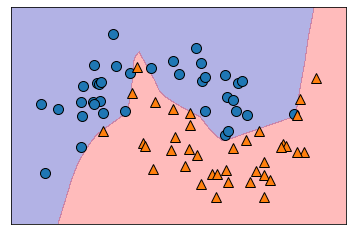

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=0)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1],y_train)

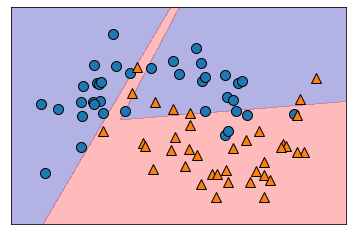

In [6]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0],X_train[:, 1],y_train)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)

print("train set score:",mlp.score(X_train,y_train))
print("test set score:",mlp.score(X_test,y_test))

train set score: 0.9389671361502347
test set score: 0.916083916083916


In [11]:
#scaling
mean_on_train = X_train.mean(axis=0)

std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train-mean_on_train) / std_on_train
X_test_scaled = (X_test-mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0).fit(X_train_scaled,y_train)

print("train set score:",mlp.score(X_train_scaled,y_train))
print("test set score:",mlp.score(X_test_scaled,y_test))

train set score: 0.9906103286384976
test set score: 0.965034965034965


C:\heejae\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
mlp = MLPClassifier(random_state=0, max_iter=1000).fit(X_train_scaled,y_train)

print("train set score:",mlp.score(X_train_scaled,y_train))
print("test set score:",mlp.score(X_test_scaled,y_test))

train set score: 1.0
test set score: 0.972027972027972


In [13]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1).fit(X_train_scaled,y_train)

print("train set score:",mlp.score(X_train_scaled,y_train))
print("test set score:",mlp.score(X_test_scaled,y_test))

train set score: 0.9882629107981221
test set score: 0.972027972027972


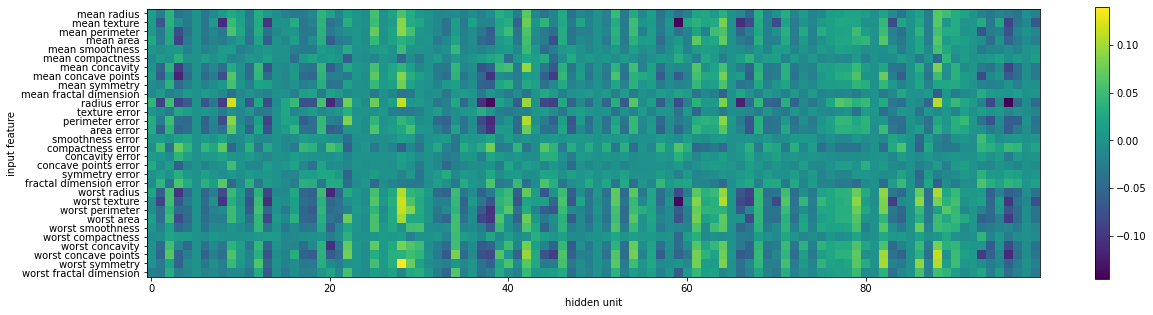

In [18]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input feature")
plt.colorbar()